In [17]:
import pandas as pd
import tweepy


In [ ]:
!pip install wordcloud


In [ ]:
!pip install textblob

In [41]:
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

In [31]:
import re

In [18]:
consumer_key = "UZsGlNd58jFSnkbzmiIj0asIH"
consumer_key_secret = "cdv0HfYrqJ7517qXQnDy7y24oaHLbmZ2z2l2ZFECzS5EwylSEG"
access_token = "1452533975180738562-iDShopCCVrvtIwlTgUzP94UHJIyjYV"
access_token_secret = "N1807EGuy1F5bCMZEreYpQfsVdiEQ7ABjpQfvMxZNOxPq"

In [19]:
access_token

'1452533975180738562-iDShopCCVrvtIwlTgUzP94UHJIyjYV'

In [32]:
auth = tweepy .OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit= True)

In [141]:
posts = api.user_timeline(screen_name = "BillGates", count = 1000, lang = "en", tweet_mode = "extended")
type(posts)

Unexpected parameter: lang


tweepy.models.ResultSet

In [48]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['tweets'])
df.head(5)

,tweets
0,I’m proud that @Breakthrough Energy is a part ...
1,Demand for syringes has skyrocketed to deliver...
2,I’m grateful for the leadership of our @Breakt...
3,Getting to zero emissions will be the hardest ...
4,I was truly inspired to hear @Vinisha27738476 ...


In [49]:
def cleanText(text):
    text = re.sub(r"@[A-Za-z0-9]+", '', text) #removed @mentions
    text = re.sub(r'#', '', text) #removing # symbol
    text = re.sub(r'RT[\s]+', '', text) #removing retweets RT
    text = re.sub(r'https?:\/\/\S+', '', text) #removes the hyperlink

    return text
df['tweets'] = df['tweets'].apply(cleanText)


df.head(5)

,tweets
0,I’m proud that Energy is a part of the First ...
1,Demand for syringes has skyrocketed to deliver...
2,I’m grateful for the leadership of our Energy...
3,Getting to zero emissions will be the hardest ...
4,I was truly inspired to hear speak at COP26 t...


In [50]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df["Subjectivity"] = df["tweets"].apply(getSubjectivity)
df["Polarity"] = df["tweets"].apply(getPolarity)

df.head(5)


,tweets,Subjectivity,Polarity
0,I’m proud that Energy is a part of the First ...,0.506667,0.258333
1,Demand for syringes has skyrocketed to deliver...,0.300000,0.000000
2,I’m grateful for the leadership of our Energy...,0.256944,0.044444
3,Getting to zero emissions will be the hardest ...,0.750000,0.800000
4,I was truly inspired to hear speak at COP26 t...,0.000000,0.000000


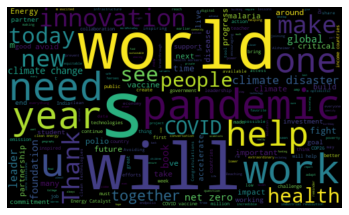

In [51]:
#plot the world cloud
allWords = " ".join([twts for twts in df["tweets"]])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [52]:
#create a funciton to get the negative, neautral and positive analysis
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

df["Analysis"] = df["Polarity"].apply(getAnalysis)

df.head(5)

,tweets,Subjectivity,Polarity,Analysis
0,I’m proud that Energy is a part of the First ...,0.506667,0.258333,Positive
1,Demand for syringes has skyrocketed to deliver...,0.300000,0.000000,Neutral
2,I’m grateful for the leadership of our Energy...,0.256944,0.044444,Positive
3,Getting to zero emissions will be the hardest ...,0.750000,0.800000,Positive
4,I was truly inspired to hear speak at COP26 t...,0.000000,0.000000,Neutral


Keyword search algo starts from here:


In [60]:
'''def get_tweets(query, count = 300):

    # empty list to store parsed tweets
    tweets = []
    target = io.open("mytweets.txt", 'w', encoding='utf-8')
    # call twitter api to fetch tweets
    q=str(query)
    a=str(q+" sarcasm")
    b=str(q+" sarcastic")
    c=str(q+" irony")
    fetched_tweets = api.search(a, count = count)+ api.search(b, count = count)+ api.search(c, count = count)
    # parsing tweets one by one
    print(len(fetched_tweets))

    for tweet in fetched_tweets:

        # empty dictionary to store required params of a tweet
        parsed_tweet = {}
        # saving text of tweet
        parsed_tweet['text'] = tweet.text
        if "http" not in tweet.text:
            line = re.sub("[^A-Za-z]", " ", tweet.text)
            target.write(line+"\n")
    return tweets'''

def get_keyword_tweets(keyword, count):
    items = api.search_30_day(label='development', query=keyword, maxResults= count)
    list1 = []
    for i in items:
        list1.append(i)
    return list1

In [67]:
test_list = get_keyword_tweets("TATASTEEL", 11)
for i in test_list:
    print(i.text)

RT @EkeFolkerts: In @trouw over de spinoff van de landbouw, sterke en innovatieve clusters die wereldwijd toonaangevend zijn. Die we kwijt…
@Benedicte_Ficq TataSteel kan CO2-neutraal produceren, maar de EU maakt het met art.6 onmogelijk om dat te kunnen b… https://t.co/1Hvpvi8cbL
RT @marketsday: Tata Motors : From Where It Earns Money?.
.
.
.
#stocks #stockmarket #stockmarketindia #investment #Investing #Diwali2021 #…
RT @ETNOWlive: #RebootIndia | The US' infrastructure plan will drive sentiment in the steel industry but it is not an easy market due to ce…
https://t.co/MnL4aaiUg3
Respected sir, request your intervention reg.merger of ts bsl &amp; tatasteel at ratio of 15:1,all our pleas to managem… https://t.co/CTA58X0mbN
@KeesBob @Mowniekjuh @brink_marion Groot gelijk hebben ze. De grafietregens van TataSteel zijn veel gevaarlijker da… https://t.co/4SK0ToEXF4
#TataTisconSD #Flexibility  

@tatatisconworld TMT Bars have superior ductility that increases flexibility and stre… https://t.

Now we will just clean up the text and put it in the table


In [68]:
dir(test_list)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [140]:
item_dict = test_list[10]._json
item_dict["lang"]

'en'

In [102]:
test_list[0].

Status(_api=<tweepy.api.API object at 0x11fcf8fa0>, _json={'created_at': 'Sat Nov 06 21:01:13 +0000 2021', 'id': 1457090720045621250, 'id_str': '1457090720045621250', 'text': 'RT @EkeFolkerts: In @trouw over de spinoff van de landbouw, sterke en innovatieve clusters die wereldwijd toonaangevend zijn. Die we kwijt…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1225455445, 'id_str': '1225455445', 'name': 'Anke Olthoff', 'screen_name': 'AnkeOlthoff', 'location': 'Wichmond in mooie Graafschap', 'url': None, 'description': 'Groene Econoom Natuur-Landschap-Landbouw #BoerenNatuur @LoesjeNL: "Als wij nu veranderen, dan hoeft het klimaat het niet te doen"  #mijntuinleeft', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_co

In [101]:
print(test_list[0].place)

AttributeError: 'NoneType' object has no attribute 'name'